In [1]:
"""
This file is used to generate everything found in Section 3: Comparison to non-dynamic Exponential Smoothing.
"""

'\nThis file is used to generate everything found in Section 3: Comparison to non-dynamic Exponential Smoothing.\n'

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from model import Model
from model_search import ModelSearch

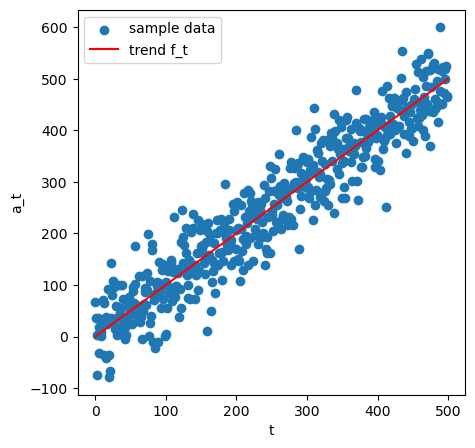

In [3]:
# set seed
np.random.seed(10)
# generate random data
num = 500
x = [i for i in range(num)]
y = [np.random.normal(x_val, 50) for x_val in x]


fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(x, y, label="sample data")
axs.set_xlabel('t')
axs.set_ylabel('a_t')

axs.plot(x, x, color='red', label="trend f_t")
axs.legend()

In [4]:
# define parameters to check
window_sizes = [5]
default_ks = [i/100 for i in range(101)]
rates_of_change = [0]
significance_levels = [0.1]

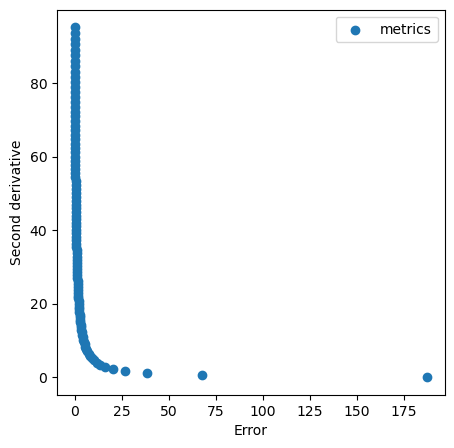

In [5]:
# search for best models
forced_decrease = False
model_search = ModelSearch(window_sizes, default_ks, rates_of_change, significance_levels, forced_decrease)
model_search.search_models(y, False)
# and plot metrics
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
model_search.plot_metrics(ax)

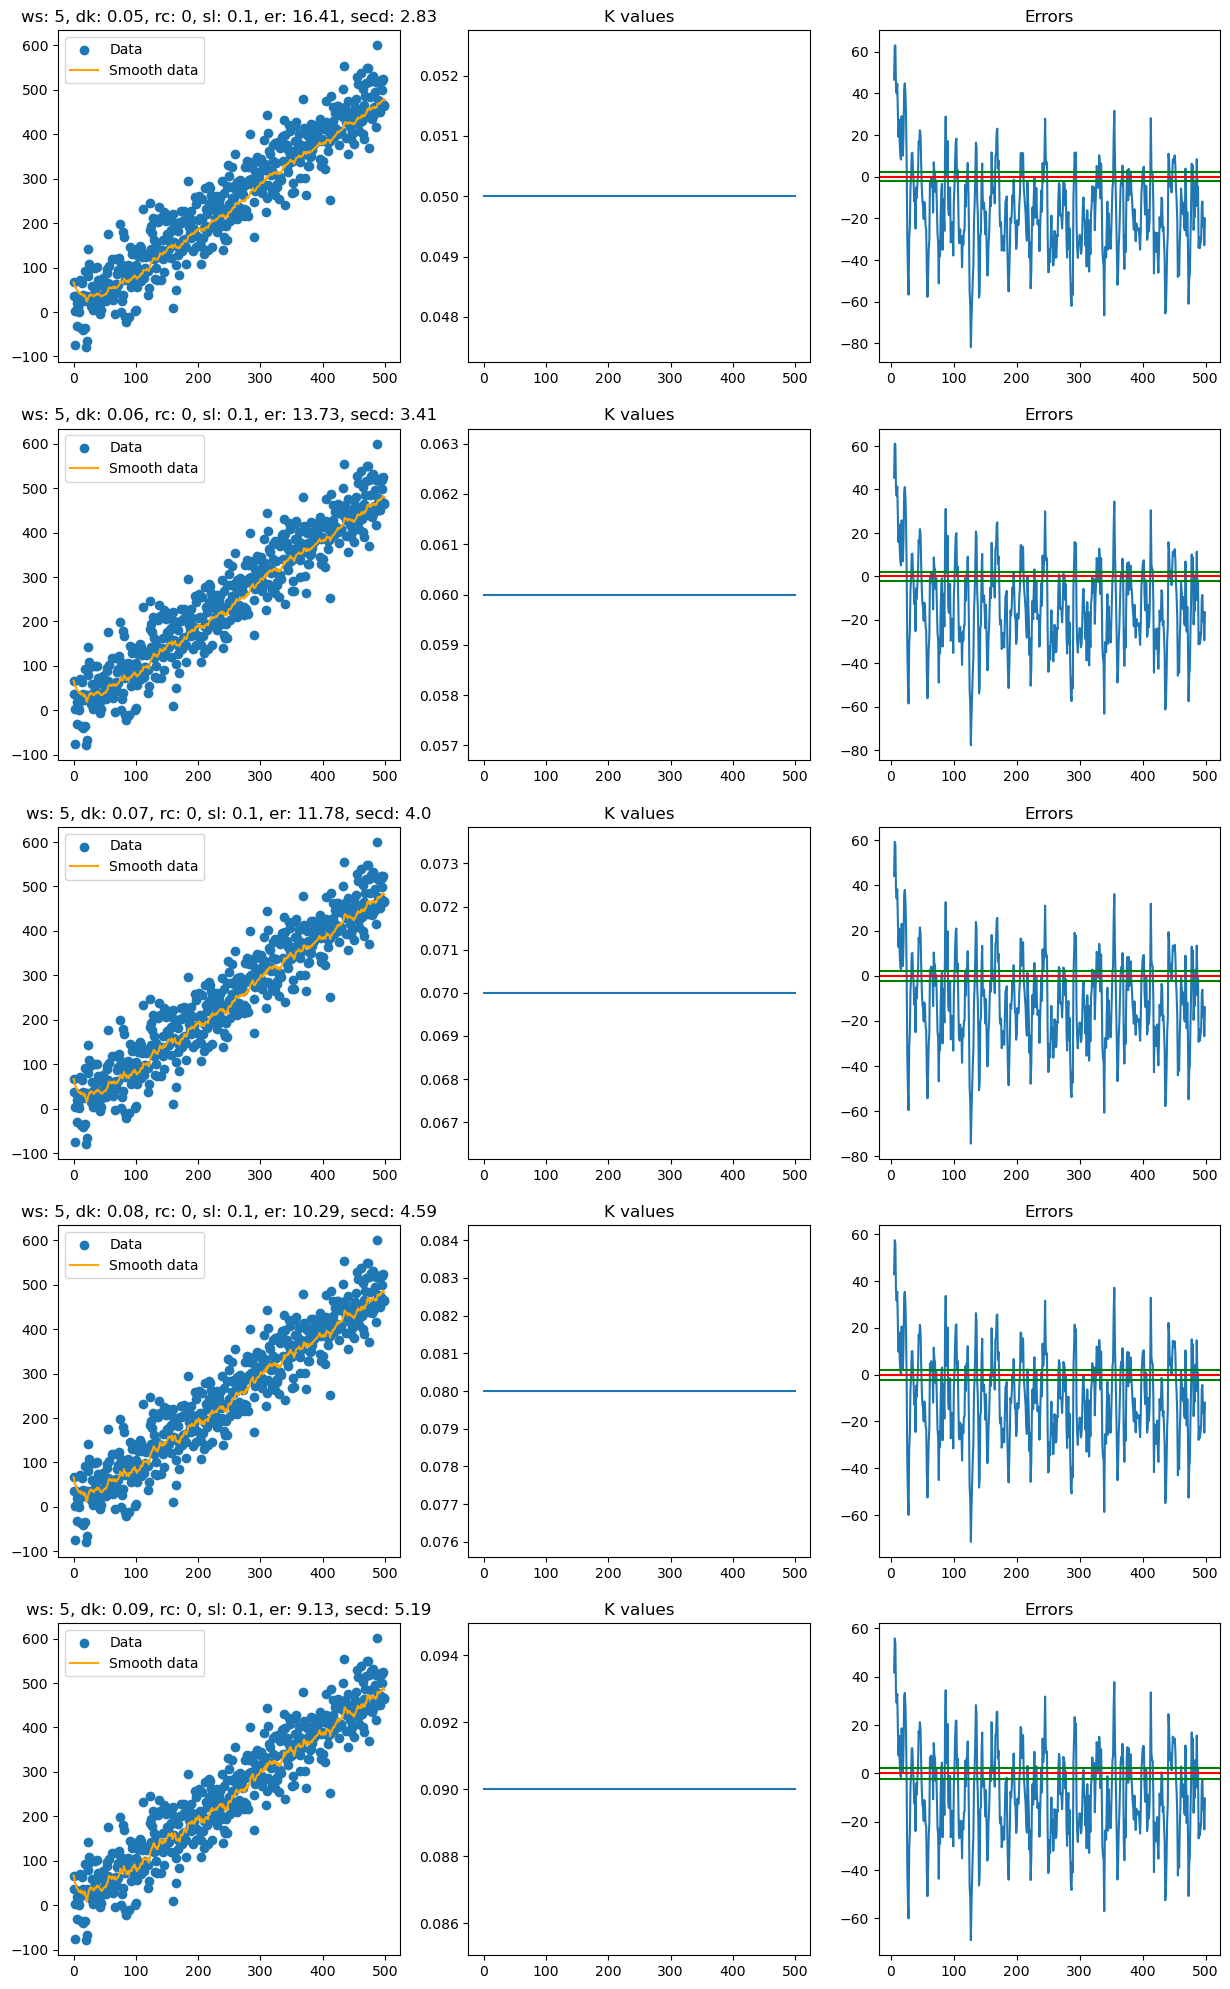

In [6]:
# get best models by error
top_num = 5
by = model_search.BY_SECOND_DERIVATIVE
constraint_by = model_search.BY_ERROR
constraint_val = 20

top_models_lx = model_search.get_top_models(top_num, by, constraint_by, constraint_val, True)
top_models = top_models_lx['models']
top_models_eval = top_models_lx['evaluations']

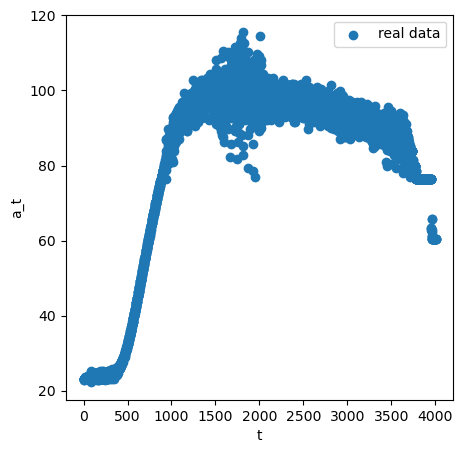

In [7]:
# get data
y_og = pd.read_excel('metinasana.xlsx', sheet_name="sheet1")['val1']
x = [i for i in range(len(y_og))]

# process data
# remove regular outliers
poly = np.polyfit(x, y_og, deg=10)
poly_val = np.polyval(poly, x)

data_df = pd.DataFrame({'val': y_og, 'poly_val': poly_val})

data_df.loc[(data_df['val'] - data_df['poly_val']).abs() > 25] = float('nan')
data_df['val'].fillna(method='ffill', inplace=True)

y = data_df['val']


fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(x, y, label="real data")

axs.set_xlabel('t')
axs.set_ylabel('a_t')
axs.legend()

In [8]:
# define parameters to check
window_sizes = [5]
default_ks = [i/100 for i in range(101)]
rates_of_change = [0]
significance_levels = [0.1]

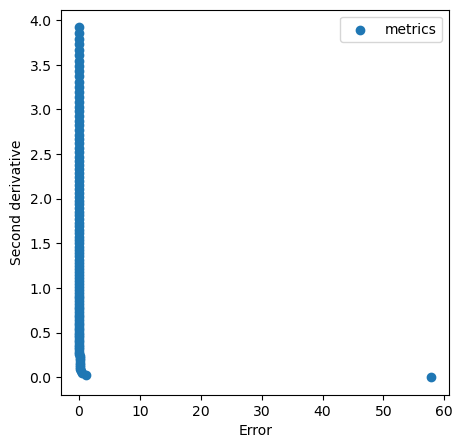

In [9]:
# search for best models
forced_decrease = False
model_search = ModelSearch(window_sizes, default_ks, rates_of_change, significance_levels, forced_decrease)
model_search.search_models(y, False)
# and plot metrics
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
model_search.plot_metrics(ax)

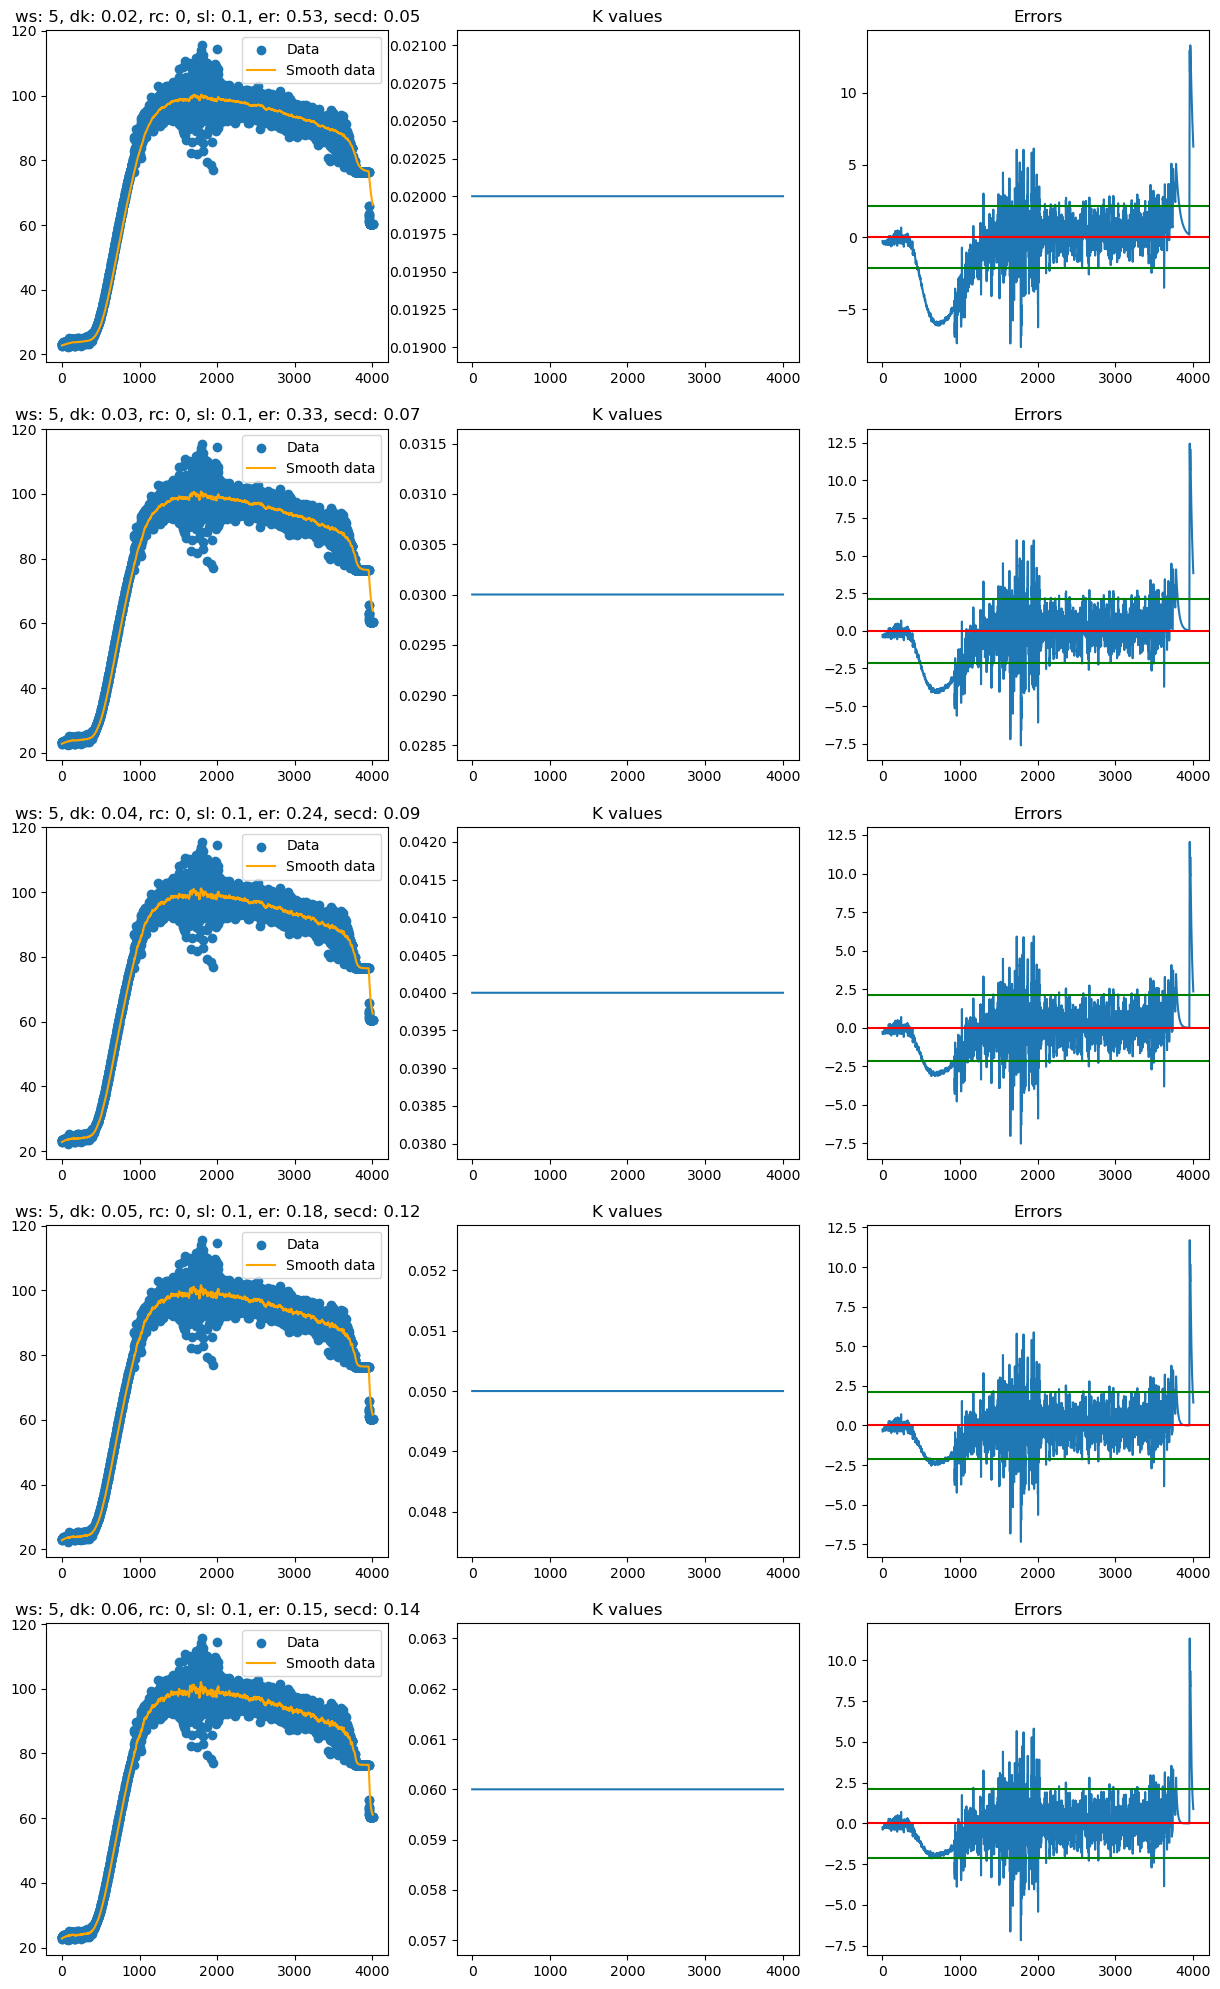

In [10]:
# get best models by error
top_num = 5
by = model_search.BY_SECOND_DERIVATIVE
constraint_by = model_search.BY_ERROR
constraint_val = 1

top_models_lx = model_search.get_top_models(top_num, by, constraint_by, constraint_val, True)
top_models = top_models_lx['models']
top_models_eval = top_models_lx['evaluations']